In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("Wine Quality.csv")

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*Id* is just an autonumber, so drop it.

In [ ]:
df.drop("Id", axis=1, inplace=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"], test_size=0.3, random_state=101)

# **EDA**

In [39]:
X_train.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,8.310000,0.531406,0.268675,2.532750,0.086949,15.35625,45.017500,0.996740,3.312113,0.658300,10.451167
std,1.758156,0.184198,0.197854,1.289115,0.046305,10.04109,32.318188,0.001943,0.155898,0.178886,1.089005
min,4.900000,0.120000,0.000000,1.200000,0.012000,1.00000,6.000000,0.990200,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.00000,20.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.00000,36.000000,0.996690,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.00000,60.000000,0.997800,3.400000,0.730000,11.125000
max,15.600000,1.580000,1.000000,15.400000,0.610000,68.00000,278.000000,1.003690,4.010000,2.000000,14.000000


In [40]:
y_train.describe()

count    800.000000
mean       5.636250
std        0.804515
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

In [41]:
missing_value_counts = X_train.isnull().sum()

In [42]:
missing_value_counts

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

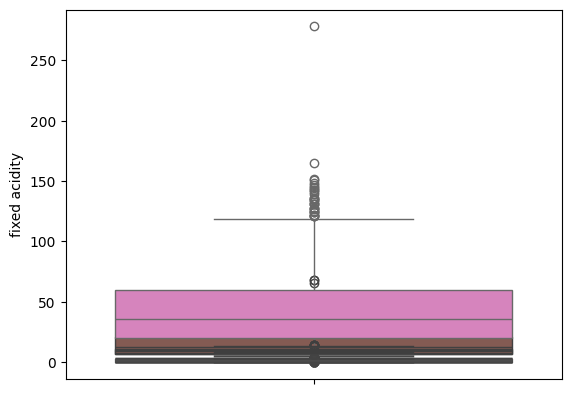

In [49]:
for col in X_train.columns:
  sns.boxplot(
    data=X_train[col],
    orient="v"
)
#plt.xticks(rotation=90)
#plt.show()

**Observations:**  
* No missing values
* All numerical
* Some fields, eg free_sulfur_dioxide and total_sulfur_dioxide have long upper tails
* Quality (target) has six integer values from 3-8 inclusive

**To do:**  
* Boxplot for each field separately
  
Looks good to go!

# **Training the Model**

In [61]:
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
# data frame of coefficients for evaluating which are most important

# **Testing the Model**

In [64]:
predictions = lm.predict(X_test)

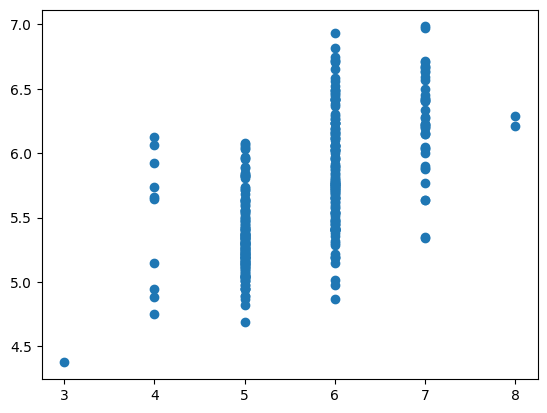

In [65]:
plt.scatter (y_test, predictions)

<ipython-input-67-5c1f26bd1b25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=20)


<Axes: xlabel='quality', ylabel='Density'>

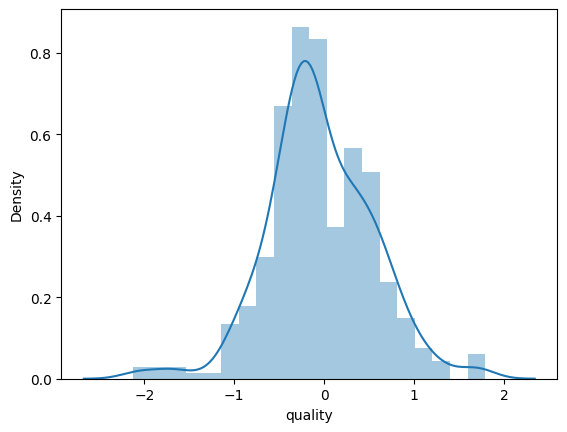

In [67]:
sns.distplot((y_test - predictions), bins=20)

**Observation:**  
Correlation appears quite weak, but the residual errors do have a normal distribution, centred on 0

# **Metrics**

In [72]:
print('MAE = ', metrics.mean_absolute_error(y_test, predictions))

MAE =  0.4570592546969112


In [73]:
print('MSE = ', metrics.mean_squared_error(y_test, predictions))

MSE =  0.3484434131075499


In [74]:
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE =  0.590290956315231


y_train had:  
* mean = 5.636250  
* std = 0.804515  
* 50% = 6.000000  
  
so those errors look reasonable.
